<h1><center><center><h1><h1><center><span style="color:#26c2c2">Machine Learning Model Building
</span><center><h1>

## Ok... previouslly we said we will use Pipeline 2 to data processing steps

### Now we are going to build the model based on this data processing, these steps is found in `Pipeline.py`

## I will import this file here :

In [1]:
import Pipelines
Pipelines

<module 'Pipelines' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\Life Expectancy (WHO)\\Pipelines.py'>

## Import Mytest file (for assertions)

In [2]:
import Mytest
Mytest

<module 'Mytest' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\Life Expectancy (WHO)\\Mytest.py'>

# My Librabies :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
                              , HistGradientBoostingRegressor, BaggingRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Remove Warning :

In [4]:
import warnings
warnings.simplefilter("ignore")

# Datasets : 

In [5]:
X_train = pd.read_csv('Datasets/xtrain_data.csv')
y_train = pd.read_csv('Datasets/ytrain_data.csv')
X_test = pd.read_csv('Datasets/xtest_data.csv')
y_test = pd.read_csv('Datasets/ytest_data.csv')

ds = Mytest.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()

### Making all data processing steps on the `X_train`,`y_train`,`X_test` and `y_test` data

In [6]:
from Pipelines import FullPipeline5

full_pipeline = FullPipeline5()
X_train, y_train = full_pipeline.fit_transform(X_train, y_train)
X_test, y_test = full_pipeline.transform(X_test, y_test)

ds = Mytest.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()
ds.check_nan_values_X()

### The Pipeline :

In [7]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('add_cols',
                 AddColumnsTransformer(col1='Hepatitis B', col2='Polio',
                                       new_col_name='vaccinations')),
                ('imputer',
                 DataFrameImputer(freq_cols=['Status', 'Country'],
                                  knn_cols=['Population'],
                                  median_cols=['Year', 'Adult Mortality',
                                               'infant deaths', 'Alcohol',
                                               'percentage expenditure',
                                               'Hepatitis B', 'Measles ',
                                               ' BMI ', 'under-five...
                 LogTransform(col='under-five deaths ', domain_shift=0.1)),
                ('label_encode', LabelEncodeColumns(cols=['Status'])),
                ('binary_encode', BinaryEncodeColumns(cols=['Country'])),
                ('scale',
                 StandardScaleTransform(cols=['Status', 'Adult Mortality',
                                              'Alcohol', 'Measles ', ' BMI ',
                                              'under-five deaths ',
                                              'Total expenditure', ' HIV/AIDS',
                                              'GDP', 'Population',
                                              ' thinness  1-19 years',
                                              'Income composition of resources',
                                              'vaccinations', 'Year']))])

## Data Now :

In [8]:
X_train.head()

,Year,Status,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,...,Income composition of resources,vaccinations,Country_bin_0,Country_bin_1,Country_bin_2,Country_bin_3,Country_bin_4,Country_bin_5,Country_bin_6,Country_bin_7
0,0.966331,0.457259,0.008568,1.239004,-1.166063,1.012192,-0.426624,1.658105,-0.679106,0.688441,...,0.821147,0.670009,0,0,0,0,0,0,0,1
1,-1.205595,0.457259,0.415433,-0.104193,-1.166063,-0.586831,-1.352062,-0.683349,-0.679106,0.481357,...,0.261285,-0.151262,0,0,0,0,0,0,1,0
2,0.097560,0.457259,1.319433,-0.283628,1.353962,-0.927688,1.438483,-0.695781,1.969365,0.003247,...,0.211298,-0.200447,0,0,0,0,0,0,1,1
3,0.097560,-2.186942,-0.749315,0.603292,0.167941,0.921965,-1.352062,1.384590,-0.679106,2.012759,...,-1.473805,0.285922,0,0,0,0,0,1,0,0
4,1.617908,0.457259,0.932615,-0.211854,0.604498,-0.591843,0.234478,-0.078300,1.453506,-0.613797,...,-1.484951,-0.248495,0,0,0,0,0,1,0,1


In [9]:
y_train.head()

,Life expectancy
0,74.9
1,71.5
2,56.2
3,81.1
4,58.9


### For visualizing errors :

In [10]:
from Pipelines import RegressionPlot

## Everything is fine let's go for the model :)

### As stated before our model works well on ensamble learning algorithms... so let's use them here

<br><br><br><br>

### Ok... I will use `Mean Absolute Error` to evaluate the model... <br><br>to know how much years does my model deviates from what should be predicted

## Ok Let's go and see some models : <br><br><br><br>

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#26c2c2' size=6>Random Forest :<font><h1>

In [11]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

train_score = rf.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 0.4335704526046108
MAE on cross-validation set: 1.209653753211963
MAE on test set: 1.1088003412969314


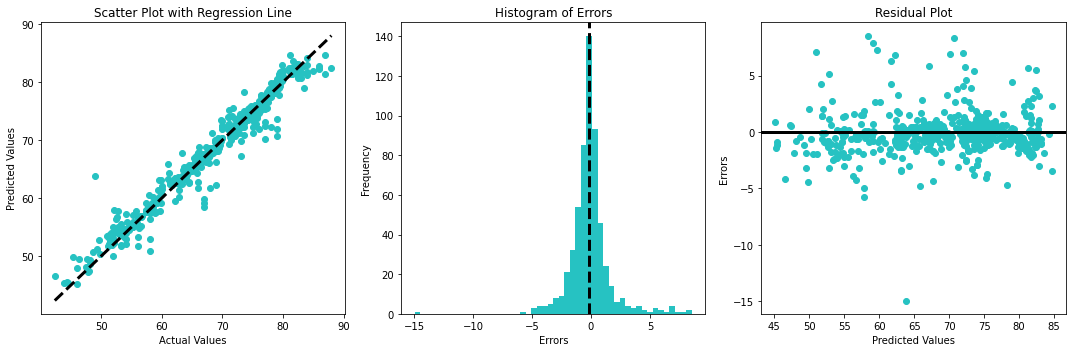

In [12]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

### Notes on <Font color='#26c2c2'>Random Forest<font> :
> - Good bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#26c2c2' size=6>Extra Trees :<font><h1>

In [13]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

train_score = et.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(et, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = et.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 1.195559358903561e-05
MAE on cross-validation set: 0.9584385809049987
MAE on test set: 0.8372781569965876


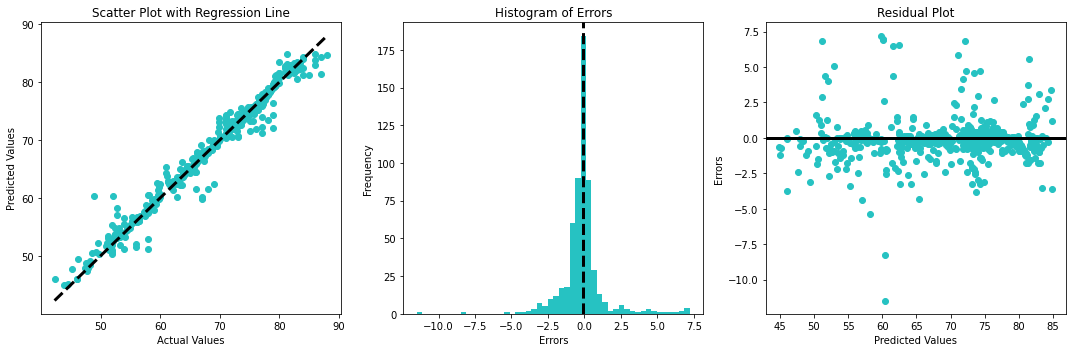

In [14]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

### Notes on <Font color='#26c2c2'>Extra Trees<font> :
> - very bias error (Powerfull model) <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#26c2c2' size=6>LGBM Regressor :<font><h1>

In [15]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

train_score = lgbm.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = lgbm.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 0.6348178467176334
MAE on cross-validation set: 1.2660012757463277
MAE on test set: 1.1745283077571305


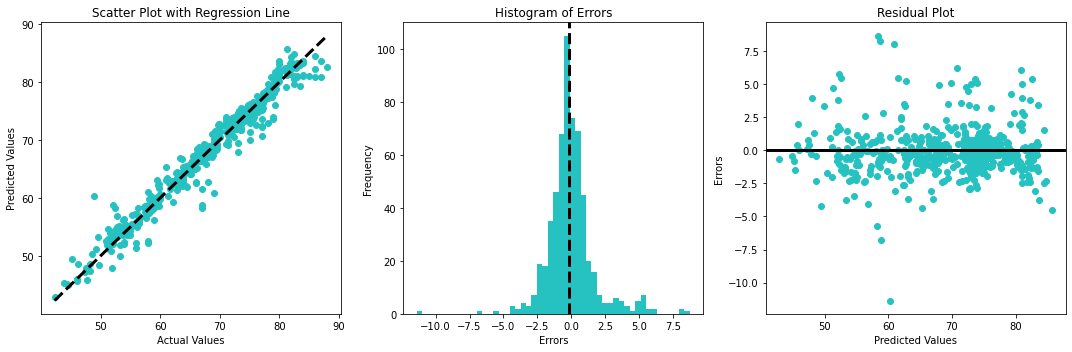

In [16]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

### Notes on <Font color='#26c2c2'>LGBM Regressor<font> :
> - Good bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#26c2c2' size=6>HistGradientBoostingRegressor :<font><h1>

In [17]:
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train)

train_score = hgb.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(hgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = hgb.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 0.6347682240803385
MAE on cross-validation set: 1.2622925634799764
MAE on test set: 1.1750029667969613


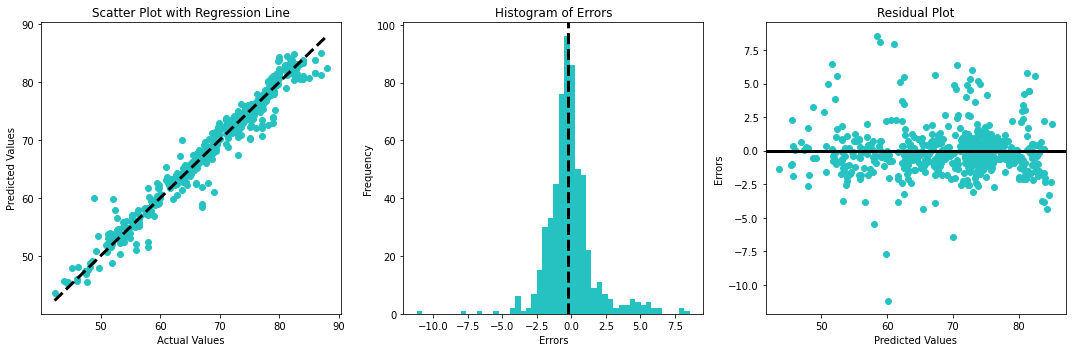

In [18]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

### Notes on <Font color='#26c2c2'>HistGradientBoostingRegressor<font> :
> - Good bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#26c2c2' size=6>Voting Regressor :</font></h1>
<h5>Using (Random Forest, ExtraTrees, HistGradientBoostingRegressor)<h5>

In [19]:
etr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
hgb = HistGradientBoostingRegressor()

voting_regressor = VotingRegressor(estimators=[('etr', etr), ('rfr', rfr), ('hgb', hgb)])
voting_regressor.fit(X_train, y_train)

train_score = voting_regressor.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = voting_regressor.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 0.3335438608632988
MAE on cross-validation set: 1.0775012659237784
MAE on test set: 0.9648823141547677


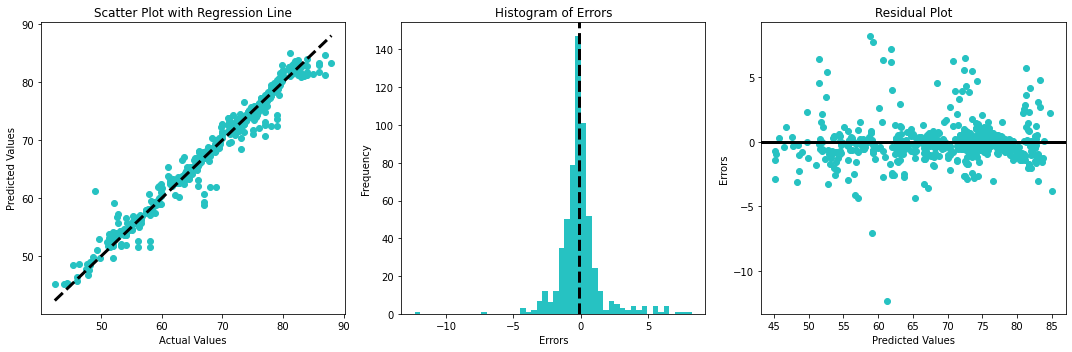

In [20]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

### Notes on <Font color='#26c2c2'>Voting Regressor<font> :
> - Very good bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

<b><hr style="border-top: 4px solid black;"/></b>

<br><br>

## Ok Best model goes for ExtraTrees, Let's tune it

In [21]:
etr = ExtraTreesRegressor(n_jobs=-1, random_state=42)

param_grid = {
    'n_estimators': [1100,1200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [22]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9673305726015309 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1100}
0.9673204120640271 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
0.9668114815985881 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1100}
0.9667641995382292 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1200}
0.9658958601224988 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1100}
0.965827315787773 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1200}
0.9652331147387013 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1100}
0.9652757821080697 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1200}
0.9603067854884012 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1100}
0.9603512470818284 {'max_depth'

In [23]:
et_tuned = ExtraTreesRegressor(n_estimators=1200,n_jobs=-1,min_samples_split=2,max_depth=None
                         ,min_samples_leaf=1,max_features='auto',bootstrap=False)
# et_tuned = ExtraTreesRegressor(n_estimators=1200,n_jobs=-1)
et_tuned.fit(X_train, y_train)

train_score = et_tuned.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(et_tuned, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = et_tuned.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 1.8004555248790504e-05
MAE on cross-validation set: 0.9452459245287477
MAE on test set: 0.823602317974986


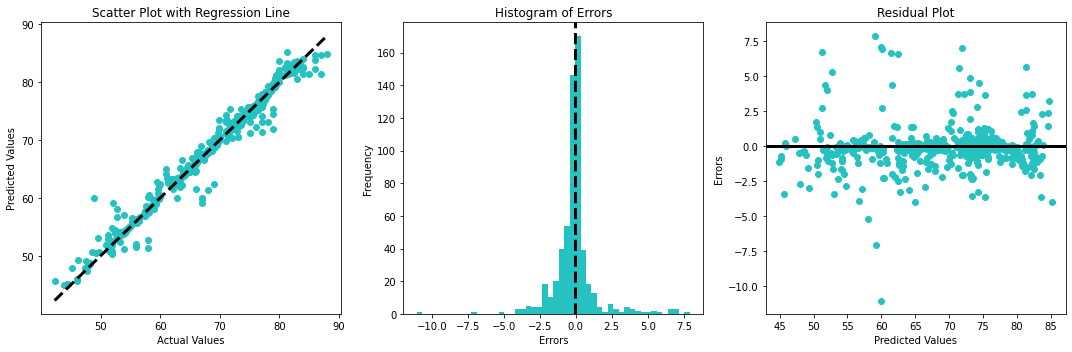

In [24]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()

<br><br><br>

### Ok now much better :)

### Now the best model is for the tuned extra trees.... and there is still place to decrease the variance again and build better model... I may try to do this later

### Let's save this model :

In [25]:
import joblib

joblib.dump(et_tuned, 'Tuned_ExtraTrees_model.pkl')

['Tuned_ExtraTrees_model.pkl']

# Now this Model is saved and ready to be reloaded again :)

# Finally this is the End